In [218]:
import source as src
import math
import random
import copy
import sys

import numpy as np
import matplotlib.pyplot as plt

In [219]:
CROSS_OVER_P = 0.01
MUTATION_P = 0.01
GEN_ITERATION = 6000
POPULATION_SIZE = 100

In [220]:
def tournament(fitness, population):
    for index, individual in enumerate(population):
        x = random.randint(0, POPULATION_SIZE-1)
        if fitness(individual, DISTANCE_MATRIX) > fitness(population[x], DISTANCE_MATRIX):
            population[index] = copy.deepcopy(population[x])
    return population


def crossover(population):
    random.shuffle(population)
    for i in range(len(population)):
        if random.random() < CROSS_OVER_P:
            pos = random.randint(0, len(population[i])-1) + 1
            tmp_i_l = copy.deepcopy(population[i][:pos])
            tmp_i_u = copy.deepcopy(population[i][pos:])
            population[i] = np.append(tmp_i_u, tmp_i_l)
    return population


def elitism(population, T):
    fitness_scores = [src.fitness_function(i, DISTANCE_MATRIX) for i in population]
    min_index, max_index = np.argsort(fitness_scores)[:T], np.argsort(fitness_scores)[-T:]
    for i in range(T):
        population[max_index[i]] = population[min_index[i]]
    random.shuffle(population)
    return population


def mutation(population):
    for index, individual in enumerate(population):
        temp = copy.deepcopy(individual)
        for i in range(len(individual)):
            if random.random() < MUTATION_P:
                pos = random.randint(0, len(individual)-1)
                temp[i], temp[pos] = temp[pos], temp[i]
        population[index] = temp
    return population


def evalution(population):
    return np.mean([src.fitness_function(i, DISTANCE_MATRIX) for i in population])


def best_sample(population):
    return np.min([src.fitness_function(i, DISTANCE_MATRIX) for i in population])

In [221]:
for i in range(1, 31):
    num_of_cities, DISTANCE_MATRIX = src.read_data(f'data(TSP)/data-{i}.txt')
    
    population = src.initialize(num_of_cities, POPULATION_SIZE)
    aver, best = [], []

    for generation in range(GEN_ITERATION):
        temp_p = tournament(src.fitness_function, population)
    #     temp_p = crossover(temp_p)
        population = mutation(temp_p)
        aver.append(evalution(population))
        best.append(best_sample(population))

        if generation % 1000 == 0:
            print(f'Gen {generation:>4d}: avg - {int(evalution(population))}  /  best - {int(best_sample(population))}')
        population = elitism(population, int(POPULATION_SIZE * 0.1))
    
    plt.title("TSP fitness trace")
    plt.plot(aver, label="Fitness, average")
    plt.plot(best, label="Fitness, best")
    plt.legend()
    plt.savefig(f"output/trace-{i}.png")
    
    txt = ""
    for route in population:
        fitness = src.fitness_function(ind1, DISTANCE_MATRIX)
        txt += f'{str('-'.join(route))}, {fitness}'
    with open(f"output/fitness-{i}.txt", "w") as f:
        f.write(txt)
    print(f'Data - {i}')

SyntaxError: f-string: unmatched '(' (3260825595.py, line 27)

In [213]:
num_of_cities, DISTANCE_MATRIX = src.read_data('data(TSP)/data-2.txt')

population = src.initialize(num_of_cities, POPULATION_SIZE)
aver, best = [], []

for generation in range(GEN_ITERATION):
    temp_p = tournament(src.fitness_function, population)
#     temp_p = crossover(temp_p)
    population = mutation(temp_p)
    aver.append(evalution(population))
    best.append(best_sample(population))
    
    if generation % 1000 == 0:
        print(f'Gen {generation:>4d}: avg - {int(evalution(population))}  /  best - {int(best_sample(population))}')
    population = elitism(population, int(POPULATION_SIZE * 0.1))


Gen    0: avg - 10281  /  best - 9693


KeyboardInterrupt: 

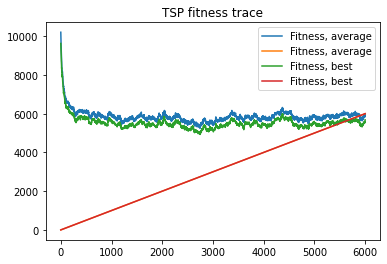

In [209]:
plt.title("TSP fitness trace")
plt.plot(aver, label="Fitness, average")
plt.plot(best, label="Fitness, best")
plt.legend()
plt.show()